# Vertex AI Model Garden - Test Model Deployments


## Overview

This notebook is used to access the models you have just deployed.


## Initialize Vertex AI 

Run the next 2 cells.

In [1]:
pip install --upgrade google-cloud-aiplatform google-cloud-logging

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [google-cloud-logging]gle-cloud-logging]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import vertexai
from vertexai.preview import model_garden

# TODO Add your project and location to initialize vertxai

vertexai.init(project="qwiklabs-asl-04-b830a8c0f45a", location="us-central1")



## Test the CodeGemma deployment

In [9]:
import google.cloud.logging
import logging

from google.cloud import aiplatform

# Do not remove logging section
client = google.cloud.logging.Client()
client.setup_logging()


# Replace your project number and endpoint id

endpoint_resource_name="projects/1024743593353/locations/us-central1/endpoints/8106640957476175872"
endpoint=aiplatform.Endpoint(endpoint_resource_name)


In [10]:

prompt = "Write a function to list n Fibonacci numbers in Python" 
max_tokens = 500 
temperature = 1.0 
top_p = 1.0  
top_k = 1 

instances = [
    {
     # Fill in the appropriate configuration
    },
]

response = endpoint.predict(
    instances=instances
)

# "<|file_separator|>" is the end of the file token.
for prediction in response.predictions:
    print(prediction.split("<|file_separator|>")[0])


print(response.deployed_model_id)

# Do not remove logging section
log_message = f"Fibonacci function: {response}"
logging.info(log_message)

InternalServerError: 500 Internal Server Error

In [11]:
from google.cloud import aiplatform
import logging

prompt = "Write a function to list n Fibonacci numbers in Python."

endpoint = aiplatform.Endpoint(
    endpoint_name="projects/1024743593353/locations/us-central1/endpoints/8106640957476175872"
)

instances = [
    {"prompt": prompt}
]

parameters = {
    "temperature": 1.0,
    "maxOutputTokens": 500,
    "topP": 1.0,
    "topK": 1,
}

# Make prediction call
response = endpoint.predict(instances=instances, parameters=parameters)

# Print response
for prediction in response.predictions:
    print(prediction.split("<|file_separator|>")[0])

print("Deployed model ID:", response.deployed_model_id)

# Logging
logging.info(f"Fibonacci function: {response}")


Prompt:
Write a function to list n Fibonacci numbers in Python.
Output:
py
<|fim_prefix|><|fim_suffix|><|fim_middle|>"""Write a function to list n Fibonacci numbers in Python
Deployed model ID: 4091879801768378368


INFO:root:Fibonacci function: Prediction(predictions=['Prompt:\nWrite a function to list n Fibonacci numbers in Python.\nOutput:\npy\n<|fim_prefix|><|fim_suffix|><|fim_middle|>"""Write a function to list n Fibonacci numbers in Python'], deployed_model_id='4091879801768378368', metadata=None, model_version_id='1', model_resource_name='projects/1024743593353/locations/us-central1/models/google_codegemma-2b-1757335227270', explanations=None)


## Test the Stable Diffusion XL deployment

INFO:root:photorealistic image: Prediction(predictions=['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAQABAADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDvBS5pBS1oYCUUuKKkBtFLRQMSijvRQAUUUCgApMUtFACU004000ANJpM80ppKYCUlLRQIZRinU0+1AWEppp1NpiEzSUEe9NNAh1FIDRQAUZpDSZo

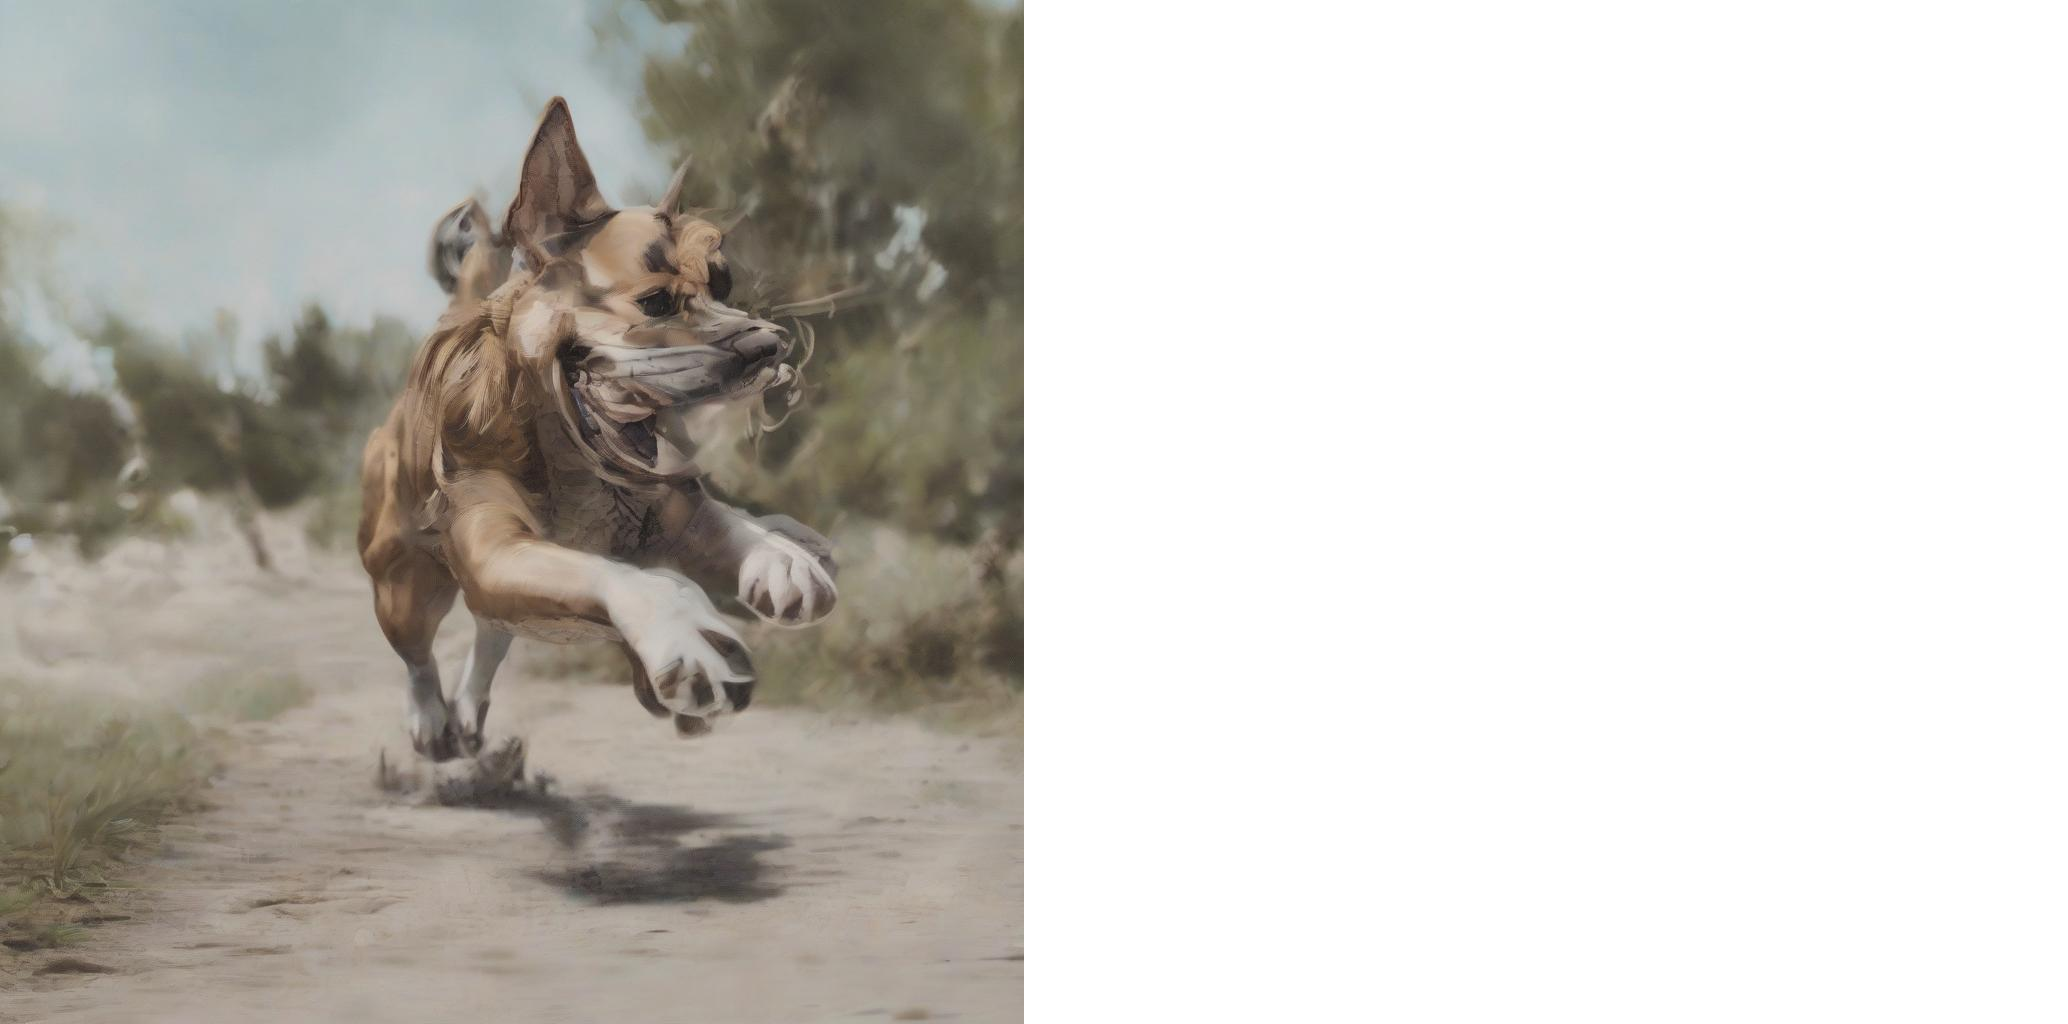

In [13]:
import base64
from io import BytesIO

from google.cloud import aiplatform
from PIL import Image


def base64_to_image(image_str):
    """Convert base64 encoded string to an image."""
    image = Image.open(BytesIO(base64.b64decode(image_str)))
    return image


def image_grid(imgs, rows=2, cols=2):
    w, h = imgs[0].size
    grid = Image.new(
        mode="RGB", size=(cols * w + 10 * cols, rows * h), color=(255, 255, 255)
    )
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w + 10 * i, i // cols * h))
    return grid

# Replace your project number and endpoint id
endpoint_resource_name="projects/1024743593353/locations/us-central1/endpoints/5861174330766917632"
endpoint=aiplatform.Endpoint(endpoint_resource_name)


instances = [
    {
        "prompt": " Generate a photorealistic image of a happy dog running",
        "height": 1024,
        "width": 1024,
    },
]
response = endpoint.predict(instances=instances)

# Do not remove logging section
log_message = f"photorealistic image: {response}"
logging.info(log_message)

images = [
    base64_to_image(response.predictions[0]),
]
image_grid(images, rows=1)



## Perform Cleanup

In [15]:
# Delete all endpoints and their deployed models
endpoints = aiplatform.Endpoint.list()

if not endpoints:
    print("No endpoints found in this project/region.")
else:
    for endpoint in endpoints:
        print(f"\nEndpoint: {endpoint.display_name} ({endpoint.resource_name})")

        deployed_models = endpoint.list_models()
        for dm in deployed_models:
            print(f"  Undeploying model ID: {dm.id}")            
            ####TODO Uncomment the statement below #### 
            endpoint.undeploy(deployed_model_id=dm.id, sync=True)
            print(f"  Undeployed model ID: {dm.id}")

        print("  Deleting endpoint...")
        endpoint.delete(sync=True)
        print(f"  Deleted endpoint: {endpoint.display_name}")

print("\nDeleting models...")
models = aiplatform.Model.list()

for model in models:
    print(f"  Deleting model: {model.display_name}")
    ####TODO  Uncomment the statement below #### 
    model.delete(sync=True)
    print("  Deleted.")

# Do not remove logging section
log_message = "Deleted endpoints"
logging.info(log_message)


Endpoint: stabilityai_stable-diffusion-xl-1-mg-one-click-deploy (projects/1024743593353/locations/us-central1/endpoints/5861174330766917632)
  Undeploying model ID: 711928281426821120
  Undeployed model ID: 711928281426821120
  Deleting endpoint...
  Deleted endpoint: stabilityai_stable-diffusion-xl-1-mg-one-click-deploy

Endpoint: google_codegemma-2b-mg-one-click-deploy (projects/1024743593353/locations/us-central1/endpoints/8106640957476175872)
  Undeploying model ID: 4091879801768378368
  Undeployed model ID: 4091879801768378368
  Deleting endpoint...
  Deleted endpoint: google_codegemma-2b-mg-one-click-deploy

Deleting models...
  Deleting model: stabilityai_stable-diffusion-xl-1-1757335280620
  Deleted.
  Deleting model: google_codegemma-2b-1757335227270
  Deleted.


INFO:root:Deleted endpoints
